In [1]:
nn = require 'nn';

***Convolutions***  
A nice graphical depiction of kernels for convolutions is [here](http://setosa.io/ev/image-kernels/). A convolution operation in images applies (through linear combination) a small matrix (called the kernel/filter) of weights  to a bigger matrix (image in this case) by sliding it over the bigger matrix in a particular fashion with the aim of generating a new matrix (called the feature map) usually of a size smaller than the bigger matrix.

In [38]:
module1 = nn.SpatialConvolutionMM(1, 16, 3, 3, 1,1, 1,1); 
-- nn.SpatialConvolution(nInputPlane, nOutputPlane, kW, kH, [dW], [dH], [padW], [padH])

Accepts input as either 3d or 4d. If 4d, the 1st dimension is the example number (This way you can pass a mini-batch of examples). If 3d, the 1st dimension is the number of channels. So, the input is usually of this form: 

batchsize X number of channels X width X height

or in 3D:

number of channels X width X height

The kW and kH parameters represent the kernel width and height. dW and dH represent the stride in both directions. Stride means the number of pixels you skip between each convolution operation. padW and padH represent the amount of zero padding you want to add if any.

In [3]:
lena = image.lena() -- quintessential image for CV community, image.fabio() also there

In [4]:
--notice the slicing to get one channel
lena[{{1}}]:size() 

   1
 512
 512
[torch.LongStorage of size 3]



***Slicing***
https://github.com/torch/demos/blob/master/tensors/slicing.lua

In [5]:
p = module1:forward(lena[{{1}}]);

In [6]:
p:size()

  16
 512
 512
[torch.LongStorage of size 3]



**How do you derive dimensions of the output image? **  
Formula:   
owidth  = floor((width  + 2*padW - kW) / dW + 1)  
oheight = floor((height + 2*padH - kH) / dH + 1)

In [7]:
require 'math';
width = 512
height = 512
padW = 1
kW = 3
dW = 1
owidth = math.floor((width+2*padW-kW)/dW + 1)

In [8]:
owidth

512	


***Image before convolution operation***

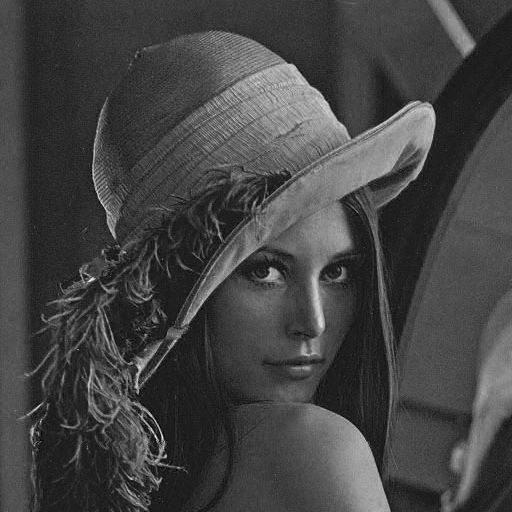

In [9]:
itorch.image(lena[3])

** 16 3x3 kernels applied to the image **

In [10]:
module1.weight

 0.2883 -0.2683  0.1118 -0.1503 -0.3110  0.1075 -0.1325 -0.0833  0.1681
 0.2225  0.0755  0.1020  0.0939  0.2466  0.0525  0.3024 -0.2786  0.1069
-0.3127 -0.0244  0.2129 -0.1916  0.3066  0.1577 -0.1359  0.1400  0.1077
-0.2138 -0.0933  0.3186  0.0016  0.3050 -0.0922 -0.0433  0.0188 -0.0414
-0.2483 -0.0980  0.0101  0.0159  0.1614  0.0154 -0.1529  0.0002 -0.3166
-0.2432 -0.1855  0.0134  0.2700  0.0569  0.1497  0.2884  0.2081 -0.3221
-0.2291 -0.1140  0.0549 -0.1156 -0.1340 -0.3211  0.3300 -0.0039 -0.0708
-0.1333  0.2208 -0.2610 -0.1830  0.0889 -0.2831 -0.2869  0.1362  0.1654
-0.2928 -0.1229  0.0427 -0.2012 -0.3325 -0.0142  0.0949  0.2535  0.2053
-0.0959  0.0034 -0.2878  0.3081  0.2966 -0.0282 -0.2616 -0.0370 -0.2194
-0.1774 -0.2368  0.2624 -0.1330  0.2343  0.0484 -0.0910 -0.2404  0.2088
 0.0330  0.1248 -0.1329 -0.1595  0.1398  0.1580 -0.2542 -0.0969 -0.2703
 0.2590  0.1174 -0.2276  0.2878 -0.2350 -0.2466  0.0529  0.1561  0.2272
-0.0365  0.2625  0.3122 -0.0302 -0.0827 -0.2457  0.1692 -0.2117 

***One of the 16 filter banks***

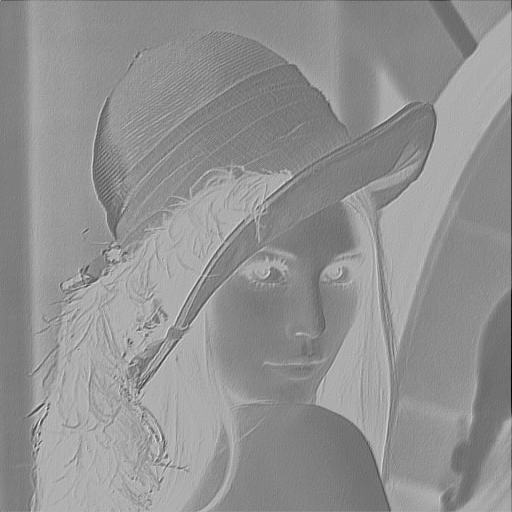

In [11]:
itorch.image(p[1])

** Aggregation/Pooling **

Summarizes the data of above layers. Reduces number of parameters. Parameters almost the same as Convolution but doesn't apply a filter/kernel to each kernel-sized region of the input image. Instead summarizes that region using L-2 norm of the values in that region, or maximum of those values, etc. 

In [12]:
module2 = nn.SpatialMaxPooling(2,2) --nn.SpatialMaxPooling(kW, kH [, dW, dH, padW, padH])

In [13]:
q = module2:forward(p);

In [14]:
q:size()

  16
 256
 256
[torch.LongStorage of size 3]



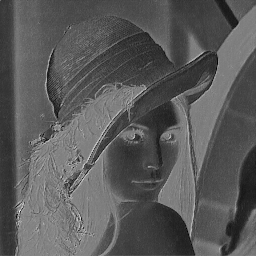

In [15]:
itorch.image(q[1])

*** Non-linearity ***

$$ tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$ 
$$ sigmoid(x) = \frac{1}{1+e^{-x}}$$
$$RELU(x) = \max(0,x)$$

In [ ]:
module3 = nn.ReLU()

In [17]:
r = module3:forward(q)

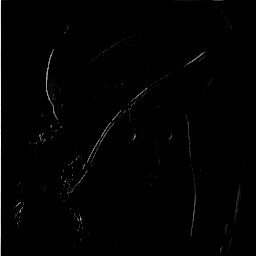

In [18]:
itorch.image(r[3])

**Fully Connected Layer**  
Usually a 2-layer perceptron -- actual classifier

In [19]:
small_image = torch.randn(16,4,4)
module4 = nn.Sequential()
module4:add(nn.Reshape(16*4*4))
module4:add(nn.Linear(16*4*4, 50))
module4:add(nn.Tanh())
module4:add(nn.Linear(50, 10))

In [20]:
module4:forward(small_image)

-0.5230
-0.1183
 0.1550
-0.1983
-0.2161
 0.9128
 0.1902
 0.3165
 0.0216
 0.0504
[torch.DoubleTensor of size 10]



**Dropout**  
Randomly drops connections between neurons. Prevents the network from depending too much on particular connection or group of connections. Refer [here](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf).

In [21]:
a = torch.ones(4)
a[2] = 3

In [22]:
a

 1
 3
 1
 1
[torch.DoubleTensor of size 4]



In [27]:
module5 = nn.Dropout(0.5,true) -- Dropout:__init(p,v1,inplace)

In [28]:
module5

nn.Dropout(0.500000)
{
  v2 : false
  noise : DoubleTensor - empty
  train : true
  p : 0.5
  gradInput : DoubleTensor - empty
  output : DoubleTensor - empty
}


In [29]:
module5:forward(a)

 1
 0
 1
 0
[torch.DoubleTensor of size 4]



In [34]:
module5:evaluate()

In [35]:
module5:forward(a)

 0.5000
 1.5000
 0.5000
 0.5000
[torch.DoubleTensor of size 4]



**Let's make a CNN**

input-size - 3x512x512  
convolution(number of output planes = 16, kernel-size = 5x5, stride = 2x2, padding = 2x2)  
max-pooling(2x2, no stride)   
convolution(number of output planes = 32, kernel-size = 5x5, stride = 2x2)  
max-pooling(3x3)  


In [63]:
model = nn.Sequential()
model:add(nn.SpatialConvolutionMM(3,16,5,5,2,2,2,2))
model:add(nn.Tanh())
model:add(nn.SpatialMaxPooling(2,2))
model:add(nn.SpatialConvolutionMM(16,32,5,5,2,2))
model:add(nn.Tanh())
model:add(nn.SpatialMaxPooling(3,3))

**What is the size of the input to the fully-connected layer?**

In [64]:
s = model:forward(lena);

In [66]:
s:size();

In [67]:
model:add(nn.Reshape(?))
model:add(nn.Linear(?, 200))
model:add(nn.Tanh())
model:add(nn.Linear(200,10))

In [77]:
model;

[string "model;..."]:1: '=' expected near ';': 

In [69]:
t = model:forward(lena)

In [70]:
t

-0.0238
-0.0078
-0.0295
 0.0531
-0.1286
-0.0138
-0.0578
 0.0392
-0.0706
-0.0833
[torch.DoubleTensor of size 10]



In [71]:
u = model:backward(lena, torch.randn(10))

In [72]:
u:size()

   3
 512
 512
[torch.LongStorage of size 3]



In [74]:
u[{{1},{1,4},{1,4}}]

(1,.,.) = 
 0.0001 *
   0.7514  0.8820  0.7356 -1.0757
  -0.5352 -1.7596  0.3448 -0.5273
   1.0010  1.6470  3.0799 -0.2373
  -3.0778  0.7549  1.1447 -0.4898
[torch.DoubleTensor of size 1x4x4]



**How to perform Gradient Descent**

In [78]:
params, paramx = model:getParameters();

In [85]:
params:size()

 2576258
[torch.LongStorage of size 1]



In [90]:
params[1] -- lua is 1-based

-0.02138002865476	


In [86]:
paramx:size()

 2576258
[torch.LongStorage of size 1]



In [91]:
paramx[1]

-0.019906194109804	


In [92]:
eta = 0.1
params:add(-eta, paramx)

In [93]:
params[1]

-0.019389409243779	


** Examples of CNNs in the wild**:

[LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf), [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), [GoogLeNet](http://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf), [VGGNet](http://arxiv.org/pdf/1409.1556.pdf), [Highway Networks](http://arxiv.org/pdf/1505.00387.pdf), [Residual Networks](http://arxiv.org/pdf/1512.03385v1.pdf)